Summary Report from the Analysis

Disclaimer: This report focused mostly on the african continent.
First of all, the data is neatly clean which shows that the collection, storing and preparration process were done with deligent.

The data is a mixed data containing both numerical and categorical variables. The numerical vaules have a very weaker correlation among themselves.

The scatterplot showed no pattern among all the numerical variables and the all don’t have a normal distribution; the distribution is plateau. Out of the first 10 countries, 4 are African countries with average annual budget of 3,024.782623, 2 Europe and Caribbean, and 1 South America and Oceania, with Oceania been the first on the list. 

This tells that African countries are spending more in their education. The Hector Bergnaum Institution has the highest annual budget of 999.756782. Total institution is 9825 from 246 countries with average annual budget of 502.08 million dollars and average student population of 25024.83

The age of institution variable was categorized into young, mid, and old. Out of the 9825 , 4881 institution falls under old, 2522 under young and 2479 under mid. 

Young age institutions are those institution between 0 and 25, mid age is between 26 and 50 and lastly, old age is between 51 and 100. Countries like Rwanda, Benin, Mali, Namibia, etc., from the Africa continent falls under old age which shows that education begun early on the African continent.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-education-monitoring-report/dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset with error handling for tokenization issues
file_path = "/kaggle/input/global-education-monitoring-report/dataset.csv"
data = pd.read_csv(file_path, on_bad_lines='skip')

# Exploring the data

In [4]:
data.head()

,institution_name,contact_email,age_of_institution,location,city,country,student_population,annual_budget_in_millions
0,Fannie McKenzie,Lottie92@yahoo.com,11,2784 Brook Road,Howellfort,Pakistan,41031,422.837594
1,Doreen Lindgren,Alfredo_Tremblay35@yahoo.com,24,14106 Torp Parkways,Dayton,Australia,47577,424.206209
2,Wm Gusikowski,Rubie.Jones@yahoo.com,25,22240 E 14th Street,Schimmelshire,Jordan,49747,368.090499
3,Dominic Lockman Jr.,Pat_Gutkowski@yahoo.com,8,41773 W Franklin Street,Moisesburgh,Antigua and Barbuda,5200,395.140980
4,Cassandra Dickens IV,Henri_Lindgren78@hotmail.com,93,5735 Post Road,Steveton,Benin,40112,413.368705


In [5]:
# Boolean mask showing which rows are duplicates
data.duplicated()

# Count how many duplicates
data.duplicated().sum()


0

In [6]:
# Remove duplicates
data = data.drop_duplicates()

In [7]:
data.isna()
data.isna().sum().sum()


0

In [8]:
# Handle missing values (if any exist)
data = data.dropna()

In [9]:
#checking if the data types are consistent

data.dtypes


institution_name              object
contact_email                 object
age_of_institution             int64
location                      object
city                          object
country                       object
student_population             int64
annual_budget_in_millions    float64
dtype: object

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   institution_name           9882 non-null   object 
 1   contact_email              9882 non-null   object 
 2   age_of_institution         9882 non-null   int64  
 3   location                   9882 non-null   object 
 4   city                       9882 non-null   object 
 5   country                    9882 non-null   object 
 6   student_population         9882 non-null   int64  
 7   annual_budget_in_millions  9882 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 617.8+ KB


In [11]:
#Checking the data types for each column
for col in data.columns:
    print(f"\nColumn: {col}")
    print(data[col].map(type).value_counts())



Column: institution_name
institution_name
<class 'str'>    9882
Name: count, dtype: int64

Column: contact_email
contact_email
<class 'str'>    9882
Name: count, dtype: int64

Column: age_of_institution
age_of_institution
<class 'int'>    9882
Name: count, dtype: int64

Column: location
location
<class 'str'>    9882
Name: count, dtype: int64

Column: city
city
<class 'str'>    9882
Name: count, dtype: int64

Column: country
country
<class 'str'>    9882
Name: count, dtype: int64

Column: student_population
student_population
<class 'int'>    9882
Name: count, dtype: int64

Column: annual_budget_in_millions
annual_budget_in_millions
<class 'float'>    9882
Name: count, dtype: int64


In [12]:
# Checking if any column has a mixed data type
from pandas.api.types import infer_dtype

for col in data.columns:
    print(col, "->", infer_dtype(data[col], skipna=True))


institution_name -> string
contact_email -> string
age_of_institution -> integer
location -> string
city -> string
country -> string
student_population -> integer
annual_budget_in_millions -> floating


In [13]:
# Ensure data types are consistent
if 'age_of_institution' in data.columns:
    data['age_of_institution'] = data['age_of_institution'].astype(int)
if 'student_population' in data.columns:
    data['student_population'] = data['student_population'].astype(int)
if 'annual_budget_in_millions' in data.columns:
    data['annual_budget_in_millions'] = data['annual_budget_in_millions'].astype(float)

In [14]:
 #Dataset Description
print("Dataset Info:\n")
data.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   institution_name           9882 non-null   object 
 1   contact_email              9882 non-null   object 
 2   age_of_institution         9882 non-null   int64  
 3   location                   9882 non-null   object 
 4   city                       9882 non-null   object 
 5   country                    9882 non-null   object 
 6   student_population         9882 non-null   int64  
 7   annual_budget_in_millions  9882 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 617.8+ KB


The dataset of global education monitoring report is clean. It has no missing number of duplicates. Thumps up for those responsible for the collecting and cleaning of the data.

# Descriptive Statistics to describe and understand the data

In [15]:
# Checking the length or dimension of the the data
len(data)

9882

In [16]:
# Dividing the data into two data frames each consisting of numerical and categorical only. 

# Numerical data consisting of both integers and floating values (int + float)
num_data = data.select_dtypes(include=['int64', 'float64'])

# Categorical (object, category, string)
cat_data = data.select_dtypes(include=['object', 'category', 'string'])
print(num_data)

      age_of_institution  student_population  annual_budget_in_millions
0                     11               41031                 422.837594
1                     24               47577                 424.206209
2                     25               49747                 368.090499
3                      8                5200                 395.140980
4                     93               40112                 413.368705
...                  ...                 ...                        ...
9877                  50               10951                 299.652429
9878                  81               45843                  85.364474
9879                  38                9288                 560.564878
9880                  16                8783                 411.269254
9881                  42               20908                 821.673197

[9882 rows x 3 columns]


In [17]:
# Performing summary statistics for tyhe numerical data
print("\nSummary Statistics:\n")
print(num_data.describe())



Summary Statistics:

       age_of_institution  student_population  annual_budget_in_millions
count         9882.000000         9882.000000                9882.000000
mean            50.130237        25024.827363                 502.083785
std             28.916607        14437.942020                 288.407691
min              1.000000          100.000000                   1.013687
25%             25.000000        12587.000000                 251.844265
50%             50.000000        25107.000000                 505.093549
75%             75.000000        37441.500000                 754.099010
max            100.000000        49996.000000                 999.756782


In [18]:
# Performing summary statistics for the categorical data.

# Loop through all categorical columns in cat_data
for col in cat_data.columns:
    print(f"\n--- Summary for '{col}' ---")
    
    # Most frequent category (mode)
    print("Most frequent (mode):", cat_data[col].mode().values[0])
    
    # Frequency counts
    print("\nFrequency counts:")
    print(cat_data[col].value_counts())
    
    # Percentage distribution
    print("\nPercentage distribution:")
    print(cat_data[col].value_counts(normalize=True) * 100)



--- Summary for 'institution_name' ---
Most frequent (mode): Adrian Runte

Frequency counts:
institution_name
Salvatore Harvey    2
Gloria Fisher       2
Delores Feil        2
Joshua Bode         2
Edith Harvey        2
                   ..
Pat Braun           1
Jose Lang           1
Florence Murazik    1
Bennie Bayer        1
Jessie Ratke        1
Name: count, Length: 9825, dtype: int64

Percentage distribution:
institution_name
Salvatore Harvey    0.020239
Gloria Fisher       0.020239
Delores Feil        0.020239
Joshua Bode         0.020239
Edith Harvey        0.020239
                      ...   
Pat Braun           0.010119
Jose Lang           0.010119
Florence Murazik    0.010119
Bennie Bayer        0.010119
Jessie Ratke        0.010119
Name: proportion, Length: 9825, dtype: float64

--- Summary for 'contact_email' ---
Most frequent (mode): Ellsworth79@gmail.com

Frequency counts:
contact_email
Oma_Fritsch@gmail.com          2
Rod79@gmail.com                2
Jon58@yahoo.com   


Correlation Matrix:

                           age_of_institution  student_population  \
age_of_institution                   1.000000           -0.005334   
student_population                  -0.005334            1.000000   
annual_budget_in_millions            0.007166            0.000092   

                           annual_budget_in_millions  
age_of_institution                          0.007166  
student_population                          0.000092  
annual_budget_in_millions                   1.000000  


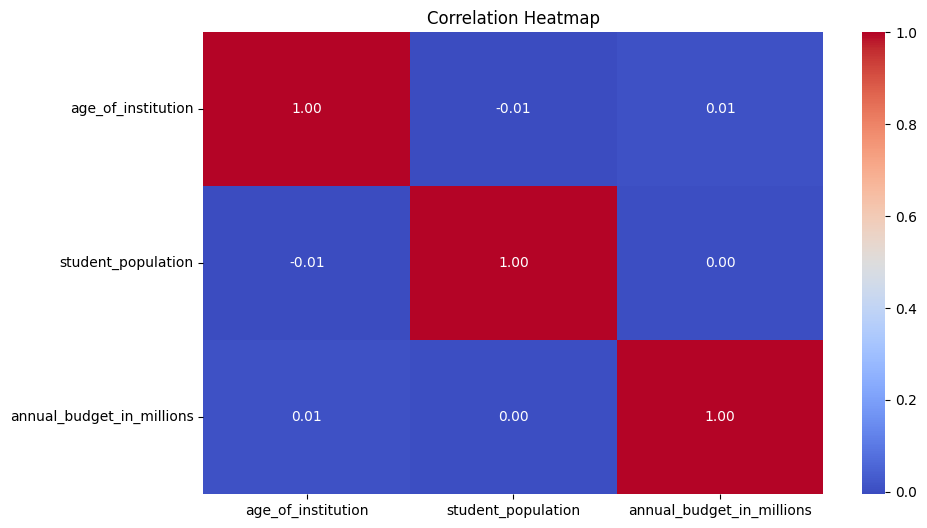

In [19]:
# Correlation Matrix
print("\nCorrelation Matrix:\n")
try:
    numeric_data = data.select_dtypes(include=[np.number])
    correlation = numeric_data.corr()
    print(correlation)

    # Visualize correlation heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
except Exception as e:
    print(f"Error computing correlation matrix: {e}")

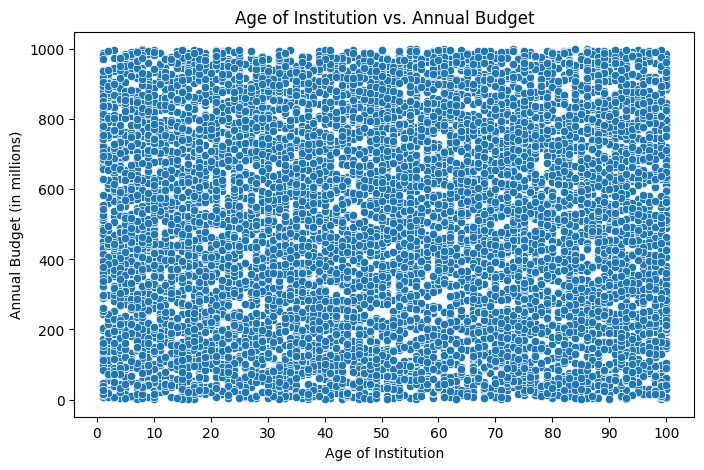

In [20]:
# Analyze relationship betweenage of institution and budget
if 'age_of_institution' in num_data.columns and 'annual_budget_in_millions' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='age_of_institution', y='annual_budget_in_millions', data=data)
    plt.xticks(ticks=np.arange(0, data['age_of_institution'].max() + 1, step=10))
    plt.title('Age of Institution vs. Annual Budget')
    plt.xlabel('Age of Institution')
    plt.ylabel('Annual Budget (in millions)')
    plt.show()


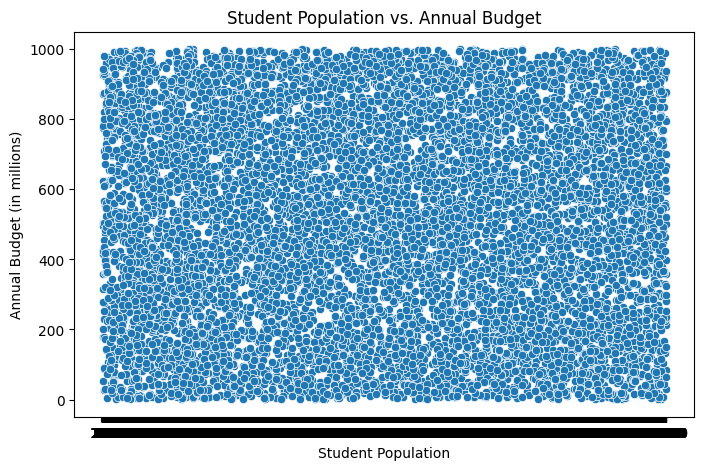

In [21]:
# Analyze relationship between student population and budget
if 'student_population' in num_data.columns and 'annual_budget_in_millions' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='student_population', y='annual_budget_in_millions', data=data)
    plt.xticks(ticks=np.arange(0, data['student_population'].max() + 1, step=10))
    plt.title('Student Population vs. Annual Budget')
    plt.xlabel('Student Population')
    plt.ylabel('Annual Budget (in millions)')
    plt.show()

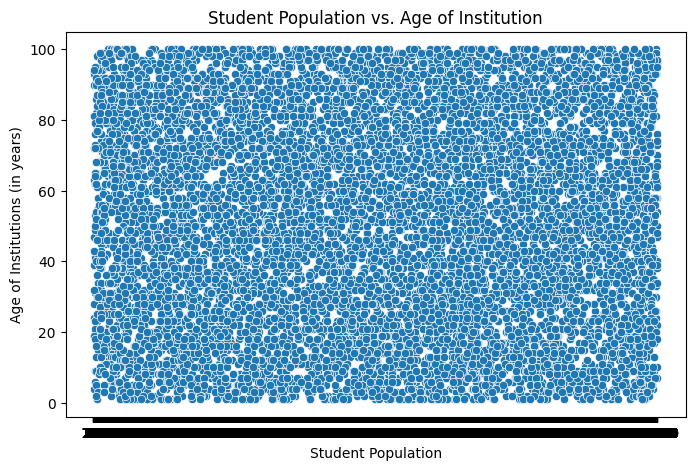

In [22]:
# Analyze relationship between student population and age of institution
if 'student_population' in num_data.columns and 'age_of_institution' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='student_population', y='age_of_institution', data=data)
    plt.xticks(ticks=np.arange(0, data['student_population'].max() + 1, step=10))
    plt.title('Student Population vs. Age of Institution')
    plt.xlabel('Student Population')
    plt.ylabel('Age of Institutions (in years)')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


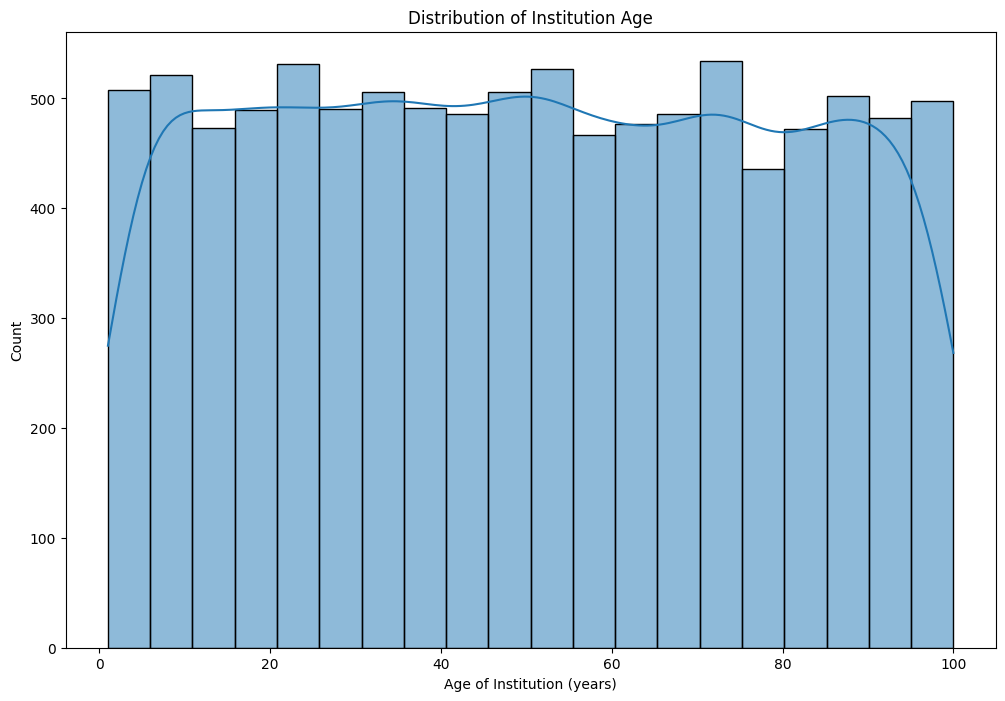

In [23]:
# Distribution of Institution Age
if 'age_of_institution' in data.columns:
    plt.figure(figsize=(12, 8))
    sns.histplot(data['age_of_institution'], bins=20, kde=True)
    plt.title('Distribution of Institution Age')
    plt.xlabel('Age of Institution (years)')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


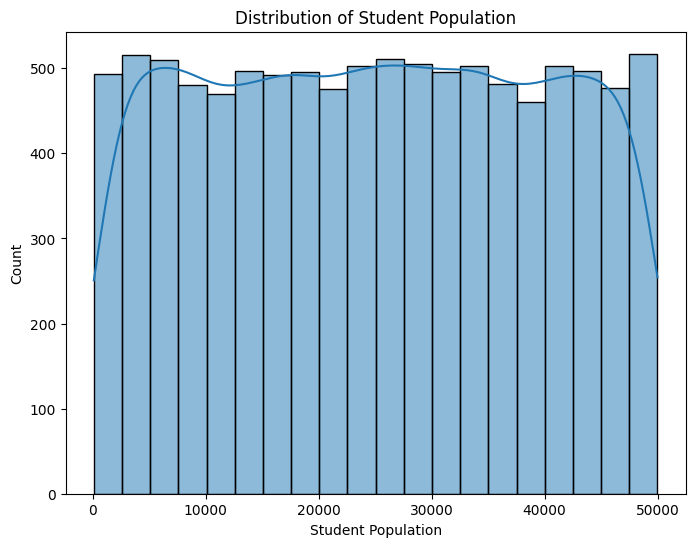

In [24]:
# Distribution of Student Population
if 'student_population' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data['student_population'], bins=20, kde=True)
    plt.title('Distribution of Student Population')
    plt.xlabel('Student Population')
    plt.show()



Average Budget by Top 10 Countries:

country
Fiji             629.594323
Algeria          608.346754
Seychelles       607.270913
Finland          603.479377
Paraguay         599.575127
Comoros          592.367103
Liechtenstein    591.055593
Bermuda          590.749626
Cuba             588.268998
Egypt            587.203530
Name: annual_budget_in_millions, dtype: float64


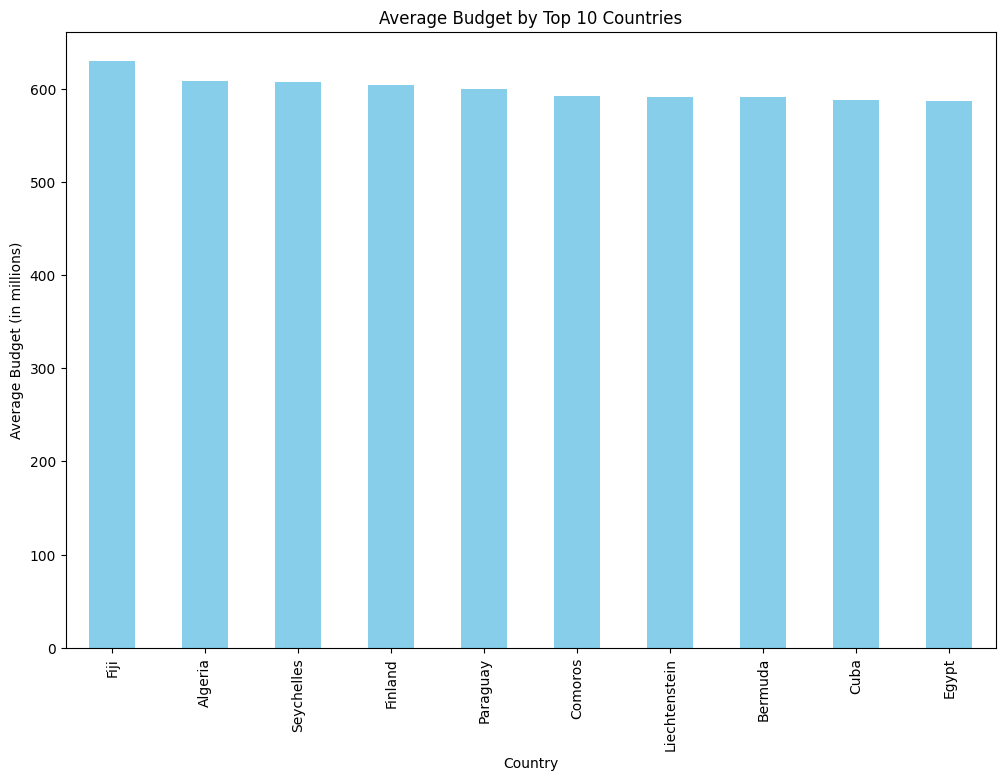

In [25]:
if 'country' in data.columns and 'annual_budget_in_millions' in data.columns:
    country_budget = data.groupby('country')['annual_budget_in_millions'].mean().sort_values(ascending=False).head(10)
    print("\nAverage Budget by Top 10 Countries:\n")
    print(country_budget)

    plt.figure(figsize=(12, 8))
    country_budget.plot(kind='bar', color='skyblue')
    plt.title('Average Budget by Top 10 Countries')
    plt.xlabel('Country')
    plt.ylabel('Average Budget (in millions)')
    plt.show()

In [26]:
# Top 10 Institutions by Budget
if 'annual_budget_in_millions' in data.columns and 'institution_name' in data.columns:
    print("\nTop 10 Institutions by Annual Budget:\n")
    top_institutions = data.nlargest(10, 'annual_budget_in_millions')
    print(top_institutions[['institution_name', 'annual_budget_in_millions']])


Top 10 Institutions by Annual Budget:

         institution_name  annual_budget_in_millions
5793      Hector Bergnaum                 999.756782
665         Alberto Olson                 999.599964
817        Terrence Mertz                 999.471514
6313  Carrie Pfannerstill                 999.356155
740         Kelley Rempel                 999.301315
2398        Sandy DuBuque                 999.299344
2851  Miss Christie Stamm                 999.265789
5097       James Mosciski                 998.784817
2635     Martha Wisoky MD                 998.774670
5557            Evan Kuhn                 998.690724


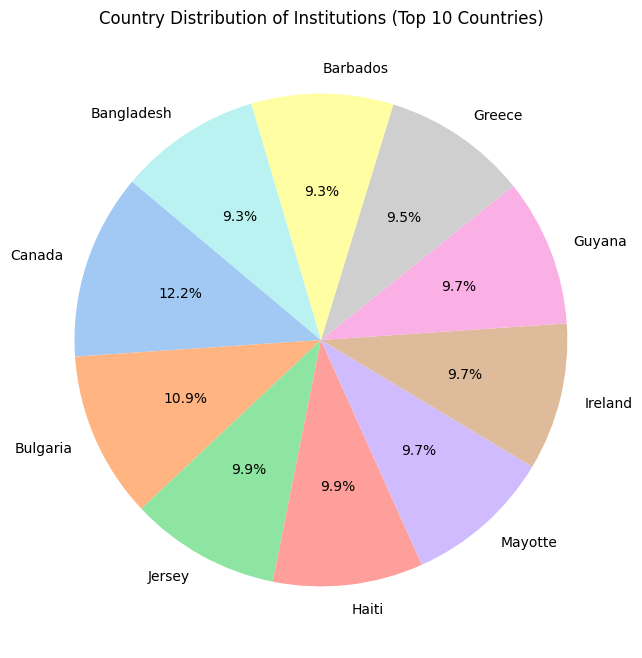

In [27]:
# Pie Chart: Country Distribution
if 'country' in data.columns:
    country_counts = data['country'].value_counts().head(10)  # Get top 10 countries
    plt.figure(figsize=(12, 8))
    plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Country Distribution of Institutions (Top 10 Countries)')
    plt.show()


In [28]:
# Step 4: Summary
summary = {
    'Total Institutions': data['institution_name'].nunique() if 'institution_name' in data.columns else 0,
    'Total Countries': data['country'].nunique() if 'country' in data.columns else 0,
    'Average Budget (in millions)': data['annual_budget_in_millions'].mean() if 'annual_budget_in_millions' in data.columns else 0,
    'Average Student Population': data['student_population'].mean() if 'student_population' in data.columns else 0
}

print("\nSummary of Key Insights:\n")
for key, value in summary.items():
    print(f"{key}: {value:.2f}")


Summary of Key Insights:

Total Institutions: 9825.00
Total Countries: 246.00
Average Budget (in millions): 502.08
Average Student Population: 25024.83


# categorical analysis

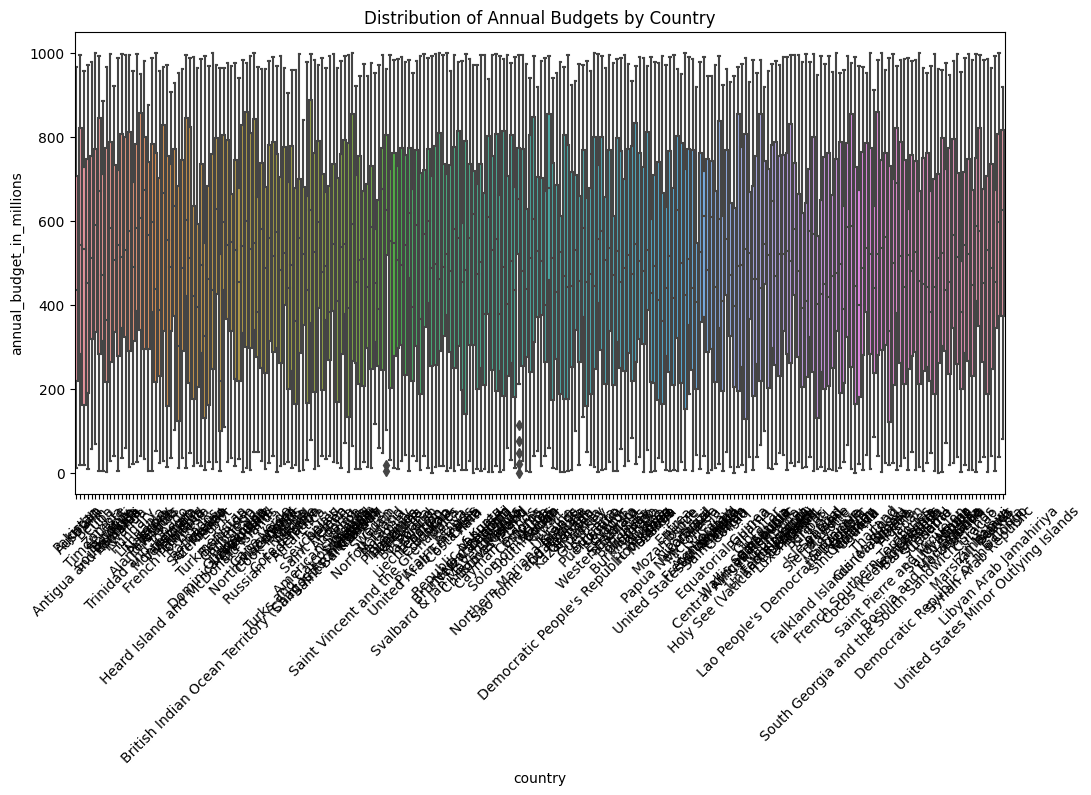

In [29]:


plt.figure(figsize=(12,6))
sns.boxplot(x="country", y="annual_budget_in_millions", data=data)
plt.xticks(rotation=45)
plt.title("Distribution of Annual Budgets by Country")
plt.show()


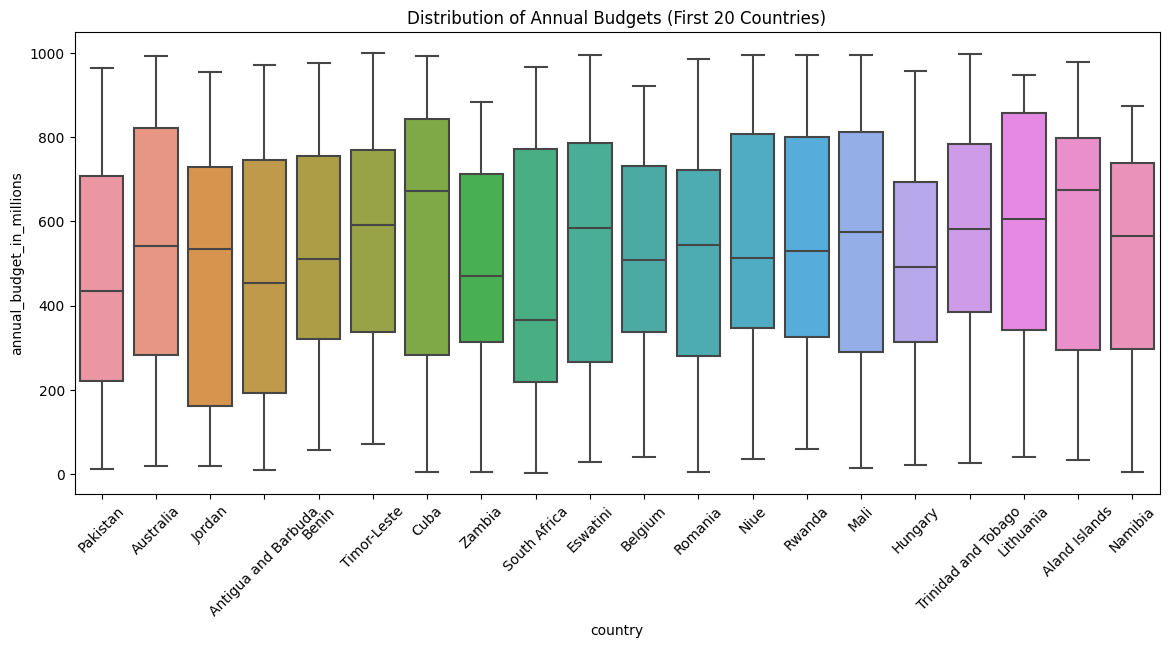

In [30]:


# Get first 20 unique countries from the dataset
first_20_countries = data["country"].unique()[:20]

# Filter dataset
subset = data[data["country"].isin(first_20_countries)]

plt.figure(figsize=(14,6))
sns.boxplot(x="country", y="annual_budget_in_millions", data=subset)
plt.xticks(rotation=45)
plt.title("Distribution of Annual Budgets (First 20 Countries)")
plt.show()


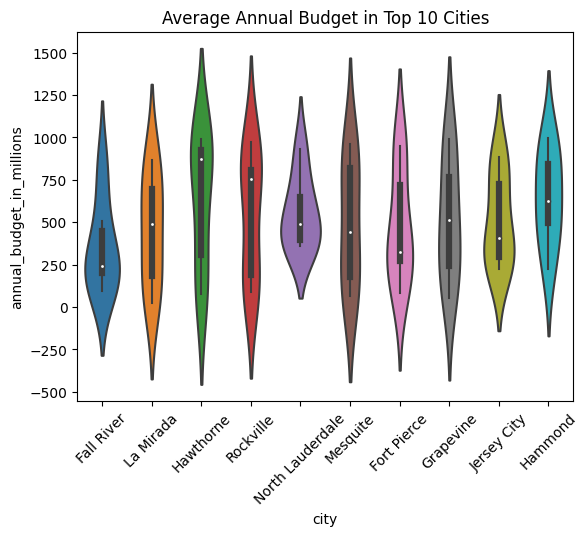

In [31]:
top_cities = data["city"].value_counts().head(10).index
sns.violinplot(
    x="city", 
    y="annual_budget_in_millions", 
    data=data[data["city"].isin(top_cities)], 
    estimator="mean"
)
plt.xticks(rotation=45)
plt.title("Average Annual Budget in Top 10 Cities")
plt.show()


# catigorizing the age of institution into 3 categories

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


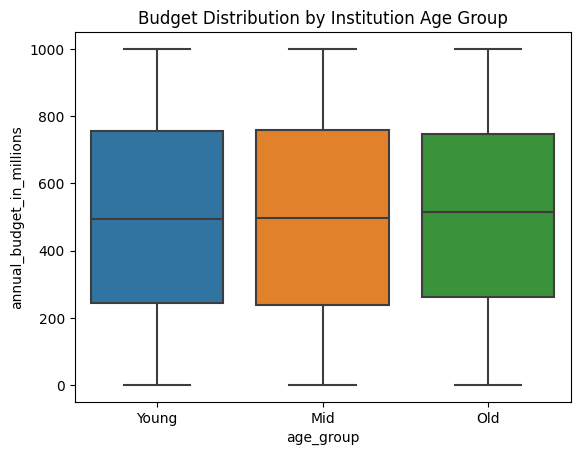

In [32]:
bins = [0, 25, 50, 100]
labels = ["Young", "Mid", "Old"]
data["age_group"] = pd.cut(data["age_of_institution"], bins=bins, labels=labels)

sns.boxplot(x="age_group", y="annual_budget_in_millions", data=data)
plt.title("Budget Distribution by Institution Age Group")
plt.show()


In [33]:
# age of institution into three categories
print(data["age_group"].value_counts())


age_group
Old      4881
Young    2522
Mid      2479
Name: count, dtype: int64


In [34]:
# checking which countries falls in which age category
countries_by_age = data.groupby("age_group")["country"].unique()
print(countries_by_age)


age_group
Young    [Pakistan, Australia, Jordan, Antigua and Barb...
Mid      [Cuba, South Africa, Romania, Niue, Trinidad a...
Old      [Benin, Eswatini, Rwanda, Mali, Hungary, Namib...
Name: country, dtype: object


<ipython-input-34-e7ba6fa9f645>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  countries_by_age = data.groupby("age_group")["country"].unique()


In [35]:
#checking which institution falls under which category
institutions_by_age = data.groupby("age_group")["institution_name"].unique()
print(institutions_by_age)


age_group
Young    [Fannie McKenzie, Doreen Lindgren, Wm Gusikows...
Mid      [Merle Gleichner, Nicholas Nitzsche, Wilbur Ha...
Old      [Cassandra Dickens IV, Kelvin Runolfsdottir, J...
Name: institution_name, dtype: object


<ipython-input-35-6b317abbff4b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  institutions_by_age = data.groupby("age_group")["institution_name"].unique()


In [36]:
for group in labels:
    print(f"\n--- {group} Institutions ---")
    display(data[data["age_group"] == group][["institution_name", "country", "age_of_institution"]])



--- Young Institutions ---


,institution_name,country,age_of_institution
0,Fannie McKenzie,Pakistan,11
1,Doreen Lindgren,Australia,24
2,Wm Gusikowski,Jordan,25
3,Dominic Lockman Jr.,Antigua and Barbuda,8
5,Kellie Fay,Timor-Leste,3
...,...,...,...
9855,Rogelio Swift,Belgium,3
9859,Brian Weber,Germany,6
9869,Nelson Gutmann,Dominican Republic,5
9873,Andrew Effertz,Poland,1



--- Mid Institutions ---


,institution_name,country,age_of_institution
6,Merle Gleichner,Cuba,44
8,Nicholas Nitzsche,South Africa,36
11,Wilbur Harvey,Romania,47
12,Mr. Darin Mueller,Niue,43
16,Orlando Klein PhD,Trinidad and Tobago,41
...,...,...,...
9870,Darrin Hilpert,Seychelles,37
9872,Colin Shanahan Sr.,Saint Martin,50
9877,Leslie Mraz,Malta,50
9879,Mr. Nicholas Kohler,Tajikistan,38



--- Old Institutions ---


,institution_name,country,age_of_institution
4,Cassandra Dickens IV,Benin,93
9,Kelvin Runolfsdottir,Eswatini,80
13,Jeanette Considine-Tillman,Rwanda,67
14,Mattie Gleichner,Mali,100
15,Carla Berge,Hungary,97
...,...,...,...
9871,Delbert Hagenes,San Marino,94
9874,Tracey Armstrong,Poland,65
9875,Mrs. Pauline Steuber IV,France,82
9876,Aubrey Schuppe,Cambodia,71


In [37]:
for group in labels:
    print(f"\n--- {group} Institutions ---")
    display(
        data[data["age_group"] == group][["institution_name", "country", "age_of_institution"]]
        .sort_values(by="age_of_institution", ascending=False)
    )



--- Young Institutions ---


,institution_name,country,age_of_institution
8211,Wilson Stracke,Algeria,25
3942,Miss Marie Douglas,Algeria,25
7006,Lloyd Dickens,Norfolk Island,25
6992,Delores Rodriguez V,Sweden,25
2704,Mike Volkman,Norfolk Island,25
...,...,...,...
3578,Dana Dietrich,Croatia,1
3566,Ms. Harriet Stokes,Angola,1
7352,Alison Batz,Iraq,1
3556,Darryl Cormier,Palau,1



--- Mid Institutions ---


,institution_name,country,age_of_institution
4851,Hilda Smith,Belarus,50
5055,Tammy Zulauf,Czechia,50
4911,Jeff Larson,Macao,50
4022,Jason Halvorson,Angola,50
4012,Stanley Okuneva,Niger,50
...,...,...,...
5711,Johanna Kreiger,Lesotho,26
822,Melissa Feest,El Salvador,26
8782,Devin Simonis,Turks and Caicos Islands,26
5907,Joe Wisoky,Equatorial Guinea,26



--- Old Institutions ---


,institution_name,country,age_of_institution
5666,Rudy Douglas,Romania,100
1235,Tabitha Tremblay,Guam,100
6717,Johanna Wuckert,Ecuador,100
7883,Jesus Dibbert,Singapore,100
3154,Pat Kshlerin,French Southern Territories,100
...,...,...,...
2605,Christine Treutel,Panama,51
5691,Jasmine Wiza-Raynor,Djibouti,51
9044,Jermaine Ziemann,Mozambique,51
8248,Brendan Goyette,Papua New Guinea,51


In [38]:
!pip install geopandas

In [39]:
import geopandas as gpd

# World map with continent info
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
country_to_continent = dict(zip(world["name"], world["continent"]))

data["continent"] = data["country"].map(country_to_continent).fillna("Unknown")


<ipython-input-39-120cfc89deac>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [40]:
data.head(3)

,institution_name,contact_email,age_of_institution,location,city,country,student_population,annual_budget_in_millions,age_group,continent
0,Fannie McKenzie,Lottie92@yahoo.com,11,2784 Brook Road,Howellfort,Pakistan,41031,422.837594,Young,Asia
1,Doreen Lindgren,Alfredo_Tremblay35@yahoo.com,24,14106 Torp Parkways,Dayton,Australia,47577,424.206209,Young,Oceania
2,Wm Gusikowski,Rubie.Jones@yahoo.com,25,22240 E 14th Street,Schimmelshire,Jordan,49747,368.090499,Young,Asia


In [41]:
avg_budget_continent = (
    data.groupby("continent")["annual_budget_in_millions"]
    .mean()
    .sort_values(ascending=False)
)

print(avg_budget_continent)


continent
Oceania          526.600224
South America    515.246883
Europe           507.333799
North America    503.804687
Antarctica       503.198957
Unknown          502.350124
Africa           497.216386
Asia             492.557139
Name: annual_budget_in_millions, dtype: float64


In [42]:
for group in labels:
    print(f"\n--- {group} Institutions by Continent ---")
    display(
        data[data["age_group"] == group][
            ["institution_name", "country", "continent", "age_of_institution"]
        ].sort_values(by="age_of_institution", ascending=False)
    )



--- Young Institutions by Continent ---


,institution_name,country,continent,age_of_institution
8211,Wilson Stracke,Algeria,Africa,25
3942,Miss Marie Douglas,Algeria,Africa,25
7006,Lloyd Dickens,Norfolk Island,Unknown,25
6992,Delores Rodriguez V,Sweden,Europe,25
2704,Mike Volkman,Norfolk Island,Unknown,25
...,...,...,...,...
3578,Dana Dietrich,Croatia,Europe,1
3566,Ms. Harriet Stokes,Angola,Africa,1
7352,Alison Batz,Iraq,Asia,1
3556,Darryl Cormier,Palau,Unknown,1



--- Mid Institutions by Continent ---


,institution_name,country,continent,age_of_institution
4851,Hilda Smith,Belarus,Europe,50
5055,Tammy Zulauf,Czechia,Europe,50
4911,Jeff Larson,Macao,Unknown,50
4022,Jason Halvorson,Angola,Africa,50
4012,Stanley Okuneva,Niger,Africa,50
...,...,...,...,...
5711,Johanna Kreiger,Lesotho,Africa,26
822,Melissa Feest,El Salvador,North America,26
8782,Devin Simonis,Turks and Caicos Islands,Unknown,26
5907,Joe Wisoky,Equatorial Guinea,Unknown,26



--- Old Institutions by Continent ---


,institution_name,country,continent,age_of_institution
5666,Rudy Douglas,Romania,Europe,100
1235,Tabitha Tremblay,Guam,Unknown,100
6717,Johanna Wuckert,Ecuador,South America,100
7883,Jesus Dibbert,Singapore,Unknown,100
3154,Pat Kshlerin,French Southern Territories,Unknown,100
...,...,...,...,...
2605,Christine Treutel,Panama,North America,51
5691,Jasmine Wiza-Raynor,Djibouti,Africa,51
9044,Jermaine Ziemann,Mozambique,Africa,51
8248,Brendan Goyette,Papua New Guinea,Oceania,51


In [43]:
countries_by_continent = (
    data.groupby("continent")["country"]
    .unique()
    .reset_index()
    .rename(columns={"country": "countries"})
)

print(countries_by_continent)


       continent                                          countries
0         Africa  [Benin, Zambia, South Africa, Rwanda, Mali, Na...
1     Antarctica                                       [Antarctica]
2           Asia  [Pakistan, Jordan, Timor-Leste, Palestine, Vie...
3         Europe  [Belgium, Romania, Hungary, Lithuania, Montene...
4  North America  [Cuba, Trinidad and Tobago, Greenland, El Salv...
5        Oceania  [Australia, New Caledonia, New Zealand, Vanuat...
6  South America  [Venezuela, Argentina, Guyana, Paraguay, Colom...
7        Unknown  [Antigua and Barbuda, Eswatini, Niue, Aland Is...
